# Multi-Agent Researcher

This notebook demonstrates the multi-agent research approach, which uses a supervisor-researcher collaborative pattern to create comprehensive reports. The system consists of:

1. A **Supervisor Agent** that plans the overall report structure and coordinates work
2. Multiple **Research Agents** that investigate specific topics in parallel
3. A workflow that produces a structured report with introduction, body sections, and conclusion

## From repo 

In [1]:
%cd ..
%load_ext autoreload
%autoreload 2

/Users/mig217/open_deep_research/src


/opt/anaconda3/envs/langchain/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
! pip install -U -q open-deep-research

# Compile the multi-agent graph

Next, we'll compile the LangGraph workflow for the multi-agent research approach. This step creates the orchestration layer that manages communication between the supervisor and research agents.

In [5]:
import uuid 
import os, getpass
import open_deep_research   
print(open_deep_research.__version__) 
from IPython.display import Image, display, Markdown
from langgraph.checkpoint.memory import MemorySaver
from open_deep_research.multi_agent import supervisor_builder

0.0.15


In [6]:
# Create a MemorySaver for checkpointing the agent's state
# This enables tracking and debugging of the multi-agent interaction
checkpointer = MemorySaver()
agent = supervisor_builder.compile(name="research_team", checkpointer=checkpointer)

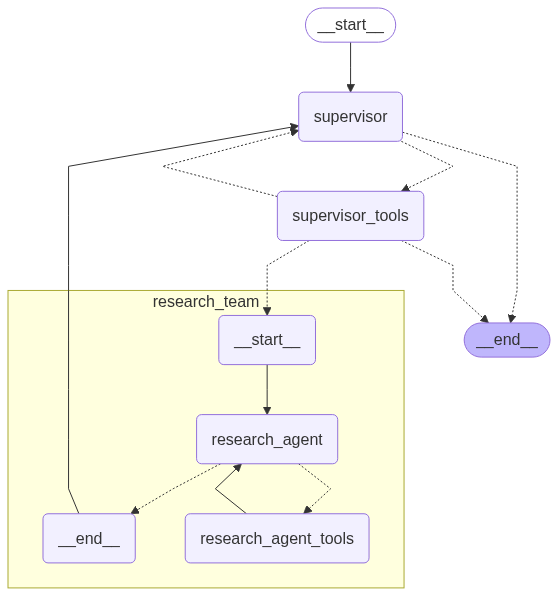

In [7]:
# Visualize the graph structure
# This shows how supervisor and research agents are connected in the workflow
display(Image(agent.get_graph(xray=1).draw_mermaid_png(max_retries=5)))

In [8]:
# Configure and run the multi-agent system
# This sets up the model configuration and executes the research workflow

# Configure models and search API for both supervisor and researcher roles
config = {
    "thread_id": str(uuid.uuid4()),
    "search_api": "tavily",
    "supervisor_model": "openai:o3",
    "researcher_model": "openai:o3",
    }

# Set up thread configuration with the specified parameters
thread_config = {"configurable": config}

# Define the research topic as a user message
msg = [{"role": "user", "content": "What is model context protocol?"}]

# Run the multi-agent workflow with the specified configuration
response = await agent.ainvoke({"messages": msg}, config=thread_config)

DefaultCredentialsError: Your default credentials were not found. To set up Application Default Credentials, see https://cloud.google.com/docs/authentication/external/set-up-adc for more information.

In [5]:
messages = agent.get_state(thread_config).values['messages']
messages[-1].pretty_print()

================================== Ai Message ==================================

Here’s what I’ve gathered so far:

• Model Context Protocol (MCP) is an open, client‑server standard created to let large‑language‑model assistants (Claude, Azure OpenAI, Copilot Studio, etc.) securely “plug into” external data sources and tools.  
• It works like a “USB‑C for AI” — an LLM (the “host”) connects through an MCP client to one or more lightweight “MCP servers.” Each server exposes specific capabilities (APIs, files, databases, SaaS apps, etc.) in a uniform JSON schema, so the model can fetch context or invoke actions.  
• The spec is public and already ships with SDKs (Python, TypeScript, Kotlin). Typical transports are STDIO, Server‑Sent Events, and WebSocket.  
• Early adopters include Anthropic’s Claude Desktop, Microsoft Azure OpenAI, and Copilot Studio. There’s a growing catalogue of pre‑built servers for Slack, GitHub, Postgres, Google Drive, etc.

Before I outline the report, I’d like 

In [6]:
msg =  [{"role": "user", "content": "Focus on Anthropic‑backed open standard for integrating external context and tools with LLMs, give an architectural overview for developers, tell me about interesting MCP servers, compare to google Agent2Agent (A2A) protocol. write the report and dont ask any follow up questions"}]
response = await agent.ainvoke({"messages": msg}, config=thread_config)
for m in agent.get_state(thread_config).values['messages']:
    m.pretty_print()

================================ Human Message =================================

What is model context protocol?
================================== Ai Message ==================================
Tool Calls:
  tavily_search (call_UAovh3IIwOUUGLXUu56A6VhD)
 Call ID: call_UAovh3IIwOUUGLXUu56A6VhD
  Args:
    queries: ['"model context protocol" MCP']
================================= Tool Message =================================
Name: tavily_search

Search results: 



--- SOURCE 1: Unleashing the Power of Model Context Protocol (MCP): A Game-Changer in ... ---
URL: https://techcommunity.microsoft.com/blog/educatordeveloperblog/unleashing-the-power-of-model-context-protocol-mcp-a-game-changer-in-ai-integrat/4397564

SUMMARY:
What is Model Context Protocol (MCP)? MCP is a protocol designed to enable AI models, such as Azure OpenAI models, to interact seamlessly with external tools and services. Think of MCP as a universal USB-C connector for AI, allowing language models to fetch informatio

/Users/rlm/Desktop/Code/open_deep_research/open-deep-research-env/lib/python3.11/site-packages/langgraph/checkpoint/serde/jsonplus.py:504: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use :meth:`~invoke` instead.
  return cls(**tup[2])


In [7]:
from IPython.display import Markdown
Markdown(agent.get_state(thread_config).values['final_report'])

# Model Context Protocol (MCP): An Architectural Guide for Developers

Large‑language‑model applications are only as powerful as the context and tools they can reach. Anthropic’s open‑sourced Model Context Protocol (MCP) emerged in late 2024 to provide a universal, vendor‑agnostic interface that lets LLM “hosts” discover, authenticate and interact with external data repositories, APIs and executable tools through lightweight servers. 

This report offers a developer‑centric walkthrough of MCP’s design, security model and growing ecosystem. It also benchmarks MCP against Google’s newer Agent2Agent (A2A) protocol to help architects choose the right abstraction layer for context‑aware or multi‑agent systems. 

The ensuing sections trace MCP’s evolution, dissect its JSON‑RPC‑based architecture, highlight production‑grade security patterns, catalogue notable servers, and examine field deployments inside companies such as Block, Apollo and Microsoft. We close with a comparative analysis that positions MCP within the broader landscape of agent interoperability standards.

## Model Context Protocol Overview

First announced by Anthropic on 25 Nov 2024, the Model Context Protocol (MCP) is an open standard that eliminates bespoke integrations by giving large language model (LLM) applications a USB‑C‑like interface to external data, prompts and executable tools.

Key goals
- Allow hosts (LLM apps) to discover & invoke servers that expose Resources, Prompts and Tools over a JSON‑RPC 2.0 channel.
- Enforce user consent and safety while enabling arbitrary data access and code execution.

Version timeline
- 2024‑11‑05: v1.0 “Final” specification released with core architecture, transports and feature set.
- 2025‑03‑26: Latest spec adds authorization, sampling and security clarifications; SDKs updated (Python v1.6, TS v1.4).
Future revisions are tracked publicly through semantic tags in the spec GitHub repo.

Governance & ecosystem
- Maintained in the ModelContextProtocol GitHub org, led by Anthropic engineers but accepting community pull‑requests under an open governance model.
- Early adopters include Block, Apollo, Replit, Sourcegraph and others building MCP servers for Google Drive, GitHub, Postgres, etc.

Licensing
- Specification and reference SDKs are distributed under the permissive MIT License; documentation is CC‑BY‑4.0, enabling free commercial adoption.

### Sources
1. https://www.anthropic.com/news/model-context-protocol
2. https://spec.modelcontextprotocol.io/specification/2025-03-26/
3. https://github.com/modelcontextprotocol/modelcontextprotocol

## MCP Architecture

The Model Context Protocol (MCP) layers cleanly around JSON‑RPC 2.0 to let large‑language‑model (LLM) hosts call external capabilities.

• **Host** – the LLM runtime (e.g., Claude, Azure OpenAI) that initiates a connection.  
• **Client** – in‑process adapter maintaining a 1‑to‑1 session with a…  
• **Server** – lightweight process exposing resources, tools and prompts.

### Message schema
• Requests, Results, Errors and Notifications reuse JSON‑RPC 2.0 fields (`id`, `method`, `params`).  
• Standard error codes (−32700 to −32603) cover parse, params and internal failures.

### Transports
• **stdio** – bidirectional stdin/stdout for local plugins.  
• **HTTP + SSE** – POST up, Server‑Sent Events down for firewall‑friendly streaming.  
• **WebSocket** – community gateways (e.g., Nchan MCP) add high‑throughput full‑duplex links. All simply carry JSON‑RPC frames.

### Session lifecycle
1. `initialize` request ⇄ response exchanges protocolVersion & capabilities.  
2. Normal traffic: either side issues requests; notifications stream progress or logs.  
3. `close` or transport drop terminates and frees resources.

### LLM consumption of tools & resources
Servers publish Tool/Resource lists; the client feeds these schemas to the model. The LLM chooses a tool by name, provides JSON args, receives results, and can read resources via URI—enabling real‑time data retrieval and action execution inside its reasoning loop.

### Sources
1. https://modelcontextprotocol.io/docs/concepts/architecture
2. https://modelcontextprotocol.io/docs/concepts/transports
3. https://techcommunity.microsoft.com/blog/educatordeveloperblog/unleashing-the-power-of-model-context-protocol-mcp-a-game-changer-in-ai-integrat/4397564

## Security & Compliance Layers

Production MCP deployments traverse several trust boundaries; each layer must enforce least‑privilege and regional compliance.

**Authentication & Authorisation**
- Gate all entrypoints with OAuth 2.0/OIDC; API‑gateway issues short‑lived JWTs.
- Down‑stream services validate tokens via Entra ID or similar and map claims to RBAC/ABAC scopes (e.g., `mcp.chat.read`, `mcp.tool.exec`).
- Apply per‑scope rate limits and audit logs to deter DoS and model exfiltration.

**Sandboxing & Execution Controls**
- LLM‑generated code runs in Docker/gVisor sandboxes (Modal Sandboxes, `llm‑sandbox`) with CPU/memory quotas, read‑only FS and egress blocks.
- Agent tool‑chains execute in separate namespaces; failures auto‑rollback.

**Data Residency & Privacy**
- Store vectors, prompts and logs only in the customer’s region/VPC; encrypt at rest with AES‑256.
- Apply field‑level pseudonymisation for PII; replicate data cross‑region only in encrypted form.

**Secure Transport & Monitoring**
- Enforce TLS 1.2/1.3 everywhere; mandate mTLS between micro‑services.
- Route prompts through content‑safety filters; stream all I/O to SIEM for real‑time anomaly detection.
- Continuous red‑teaming against OWASP LLM Top‑10 (prompt injection, insecure output, supply‑chain).

These layered controls uphold confidentiality, integrity and availability while aligning with GDPR, HIPAA and internal policy baselines.

### Sources
1. https://learn.microsoft.com/en-us/ai/playbook/technology-guidance/generative-ai/mlops-in-openai/security/security-plan-llm-application
2. https://www.zenml.io/blog/production-llm-security-real-world-strategies-from-industry-leaders
3. https://hackernoon.com/introducing-llm-sandbox-securely-execute-llm-generated-code-with-ease

## Ecosystem of MCP Servers

The MCP repository now hosts 200+ servers, ranging from core reference builds to company‑maintained integrations. Key examples illustrate the pattern:

• GitHub (official): declares ~40 JSON‑schema tools for issues, PRs, and repo content. It also publishes repo:// resources that let LLMs stream files or entire branches. Typical launch: `docker run ghcr.io/github/github-mcp-server -e GITHUB_PERSONAL_ACCESS_TOKEN` inside Claude or VS Code agent mode.

• Slack: exposes workspace resources only as tools (e.g., slack_list_channels, slack_post_message). Tokens and channel IDs are injected via env‑vars; agents mostly use it for summarising threads or posting automated alerts.

• Google Drive (reference): surfaces files both as drive:// resources and as tools (list_files, download_file), enabling retrieval or RAG pipelines without leaking credentials—started with `npx -y @modelcontextprotocol/server-google-drive`.

• PostgreSQL: offers read‑only SQL access; schemas appear as table resources, while a single query tool executes parameterised SQL. Devs mount it with a connection URI and often pair it with RAG memory servers.

• Puppeteer: provides a fetch_resource plus actions like click or screenshot, letting agents automate browsers for scraping or testing.

• Filesystem: mounts host paths into the container, then grants read/write tools and file://system resources; common for local code editing by desktop AI.

Across servers the contract is consistent—JSON‑based tool specs, optional resource URIs, and transport via stdio or SSE—so clients can mix‑and‑match integrations with one config stanza.

### Sources
1. https://github.com/github/github-mcp-server
2. https://github.com/modelcontextprotocol/servers/blob/main/src/slack/README.md
3. https://modelcontextprotocol.io/examples
4. https://mcpservers.org/servers/modelcontextprotocol/postgres

## Case Studies of Early Adopters

- Claude Desktop (Anthropic) added Model Context Protocol (MCP) support in Nov‑2024. Users enable MCP servers via a simple JSON config; e.g., a Brave‑Search server gives Claude real‑time web results in seconds. Early feedback shows integration can be completed in <5 min and re‑used across IDEs, proving the value of an open, transport‑agnostic standard.  
- Block adopted MCP to link Claude with proprietary financial data stores. The company reports faster analyst workflows while retaining data residency because connectors run inside Block’s environment, emphasizing that security controls are a prerequisite for enterprise AI roll‑outs.  
- Apollo connected its CRM to Claude through MCP, letting sales staff query customer data conversationally. The project highlighted the need for fine‑grained permissions so the assistant surfaces only relevant records.  
- Microsoft Copilot Studio (preview) introduced “generative orchestration.” Agents can dynamically choose internal actions, topics and knowledge to satisfy multi‑intent queries. Implementation is UI‑driven—makers toggle Generative mode and supply descriptive metadata. Pilot customers report more natural dialogs and automated task chaining; limitations include English‑only support and disambiguation gaps.  

Key lesson: open, extensible protocols (MCP) and orchestration layers (Copilot Studio) accelerate early wins, but success hinges on robust security boundaries, high‑quality metadata and clear user consent.

### Sources
1. https://learn.microsoft.com/en-us/microsoft-copilot-studio/advanced-generative-actions
2. https://dataconomy.com/2024/11/26/how-anthropics-mcp-might-finally-make-ai-less-dumb-about-context/
3. https://digialps.com/anthropic-introduces-mcp-a-framework-that-allows-claude-to-run-and-connect-to-servers/

## Comparative Analysis – MCP vs Google Agent2Agent

• Protocol goals  
– MCP: standardizes how LLM “hosts” call external resources, tools and prompts.  
– A2A: focuses on inter‑agent collaboration so heterogeneous agents can share tasks, context and results.

• Architecture  
– MCP: host‑client‑server triad; persistent JSON‑RPC sessions over stdio or HTTP + SSE; capability negotiation gates features.  
– A2A: client‑agent ↔ remote‑agent over HTTP; discovery via /.well‑known/agent.json; task lifecycle (submitted→working→completed) with optional SSE or webhook push.

• Schema  
– MCP: strongly‑typed JSON‑RPC messages; canonical TypeScript definitions published as JSON Schema.  
– A2A: JSON Schema in repo; core objects AgentCard, Task, Message>Part, Artifact.

• Security  
– MCP: TLS on remote transports, explicit authorization handshake, server isolation prevents cross‑server data leakage.  
– A2A: “secure‑by‑default” with enterprise‑grade auth mirroring OpenAPI schemes; auth fields advertised in AgentCard.

• Ecosystem maturity  
– MCP: spec versions since 2023; stable 2024‑11; SDKs (TS, Python, Java); already embedded in Claude Desktop & Google ADK.  
– A2A: launched Apr 2025; >50 launch partners and 11 k⭐ GitHub; draft 0.x spec, rapid community iteration.

• Developer experience  
– MCP: progressive feature flags, small server stubs, Inspector debugger.  
– A2A: sample agents (ADK, CrewAI, LangGraph), CLI, multi‑agent web demo; plain HTTP/JSON eases onboarding but spec still moving.

### Sources
1. https://modelcontextprotocol.io/specification/2025-03-26/architecture
2. https://google.github.io/A2A/
3. https://developers.googleblog.com/en/a2a-a-new-era-of-agent-interoperability/

## Conclusion

Model Context Protocol delivers a pragmatic, language‑model–first answer to the long‑standing problem of unifying data and tool access. Its strengths stem from a simple JSON‑schema, transport flexibility, and an ecosystem that can be expanded or replaced without retraining models. Early adopters report faster agent development cycles, reduced connector maintenance, and cleaner security boundaries compared with bespoke integrations.

Compared with Google’s A2A, MCP is:
* earlier to open‑source release and already shipping in production tools (Claude Desktop, Copilot Studio)
* narrower in scope (context & tool invocation vs. full multi‑agent orchestration) yet easier to embed inside a single‑agent product
* backed by a growing catalogue of lightweight servers that developers can remix or extend.

Choosing a protocol ultimately hinges on system goals: if you need drop‑in connectors for content repositories and APIs today, MCP provides the quickest path. If you’re building a research‑grade swarm of specialized agents, A2A’s peer‑to‑peer semantics may appeal, though the standard is still maturing.

### Quick side‑by‑side snapshot

| Dimension | MCP (Anthropic) | A2A (Google) |
|---|---|---|
| Initial release | Nov 2024 (open‑sourced) | Feb 2025 (alpha docs) |
| Core focus | External context + tool calls for an LLM host | Messaging & coordination among multiple agents |
| Transport options | STDIO, SSE, WebSocket | GRPC‑stream, WebSocket |
| Message format | JSON‑RPC‑like with typed resources & tools | Protobuf envelopes (AgentRequest/Response) |
| Security primitives | OAuth2, local sandbox, fine‑grained scopes | Mutual‑TLS + JWT claims, ACL per agent |
| Ecosystem status | 40+ OSS servers, SDKs (Py/TS/Kotlin) | Few reference agents, limited connectors |

Across the board, MCP represents a lean, production‑ready layer for enriching LLMs with live data and actionable tools, while maintaining the portability and safety developers expect from an open standard.

Trace: 

> Note: uses 456k tokens 

https://smith.langchain.com/public/f1581fa5-dfc9-445c-a8f4-3518a05cd139/r